In [54]:
import sqlite3
import pandas as pd
import numpy as np

In [55]:
db = pd.read_csv('DB_Teste_atualizada.csv')
db.drop(['index'], axis=1, inplace=True)
db.rename(columns = {'Data da Venda':'Data_da_Venda'}, inplace=True)
db

,Cliente,ID,Tipo,Data_da_Venda,Categoria,Vendedor,Regional,Duracao_do_Contrato_Meses,Equipe,Valor
0,Cliente 1,2017-0022,Serviços,02/01/2018,Novo Logo,Vendedor 1,Brasil,1,Time 1,24800.00
1,Cliente 10,2018-0088,Serviços,14/02/2018,Novo Logo,Vendedor 1,Brasil,6,Time 1,302720.00
2,Cliente 10,2018-0104,Serviços,13/03/2018,Upselling,Vendedor 1,Brasil,1,Time 1,51894.86
3,Cliente 10,2018-0168,Serviços,30/04/2018,Upselling,Vendedor 1,Brasil,2,Time 1,51894.86
4,Cliente 10,2018-0169,Serviços,30/04/2018,Upselling,Vendedor 1,Brasil,2,Time 1,51894.86
...,...,...,...,...,...,...,...,...,...,...
848,Cliente 96,2020-2928,Serviços,30/10/2020,Cross selling,Vendedor 1,Brasil,14,Time 1,273000.00
849,Cliente 96,2021-3613,Produtos,15/03/2021,Upselling,Vendedor 13,Brasil,24,Time 3,120964.32
850,Cliente 97,2020-2164,Produtos,07/05/2020,Novo Logo,Vendedor 19,Brasil,39,Time 3,281880.00
851,Cliente 98,2020-2285,Produtos,11/05/2020,Novo Logo,Vendedor 19,Brasil,12,Time 3,720000.00


In [56]:
db = pd.read_csv('DB_Teste_atualizada.csv')
db.columns = db.columns.str.strip()
connection = sqlite3.connect('DB_Teste.db')
db.to_sql('DB_Teste', connection, if_exists='replace')
connection.close()

In [57]:
db = sqlite3.connect('DB_Teste.db')
cursor = db.cursor()

# Listar todas as vendas (ID) e seus respectivos clientes apenas no ano de 2020

In [80]:
query = cursor.execute("SELECT ID, Cliente, Data_da_Venda FROM DB_Teste WHERE Data_da_Venda like '%2020';")
query = query.fetchall()
vendasID_cliente = pd.DataFrame(query, columns=['ID', 'Cliente', 'Data_da_Venda']).sort_values('Data_da_Venda')
vendasID_cliente

,ID,Cliente,Data_da_Venda
4,2020-2233,Cliente 10,01/04/2020
276,2020-2248,Cliente 89,01/05/2020
182,2020-2435,Cliente 5,01/07/2020
245,2019-1853,Cliente 8,01/07/2020
21,2020-3105,Cliente 104,01/08/2020
...,...,...,...
28,2020-2644,Cliente 110,31/08/2020
29,2020-2639,Cliente 111,31/08/2020
30,2020-2580,Cliente 111,31/08/2020
200,2020-2574,Cliente 50,31/08/2020


# Listar a equipe de cada vendedor

In [82]:
query = cursor.execute("SELECT DISTINCT Equipe, Vendedor FROM DB_Teste GROUP BY Vendedor")
query = query.fetchall()
equipe_vendedor = pd.DataFrame(query, columns=['Equipe', 'Vendedor'])
equipe_vendedor

,Equipe,Vendedor
0,Time 1,Vendedor 1
1,Time 7,Vendedor 10
2,Time 3,Vendedor 11
3,Time 10,Vendedor 12
4,Time 3,Vendedor 13
5,Time 3,Vendedor 14
6,Time 3,Vendedor 15
7,Time 3,Vendedor 16
8,Time 8,Vendedor 17
9,Time 1,Vendedor 18


# Construir uma tabela que avalia trimestralmente o resultado de vendas e plote um gráfico deste histórico

In [67]:
query = cursor.execute(
'''SELECT 
	strftime('%Y', (substr(Data_da_Venda,7,4) || '-' || substr(Data_da_Venda,4,2) || '-' || substr(Data_da_Venda,1,2)) ) as Ano,
	CASE
		WHEN 0 + strftime('%m', (substr(Data_da_Venda,7,4) || '-' || substr(Data_da_Venda,4,2) || '-' || substr(Data_da_Venda,1,2)) ) BETWEEN  01 and  03 then '1'
        WHEN 0 + strftime('%m', (substr(Data_da_Venda,7,4) || '-' || substr(Data_da_Venda,4,2) || '-' || substr(Data_da_Venda,1,2)) ) BETWEEN  04 and  06 then '2'
        WHEN 0 + strftime('%m', (substr(Data_da_Venda,7,4) || '-' || substr(Data_da_Venda,4,2) || '-' || substr(Data_da_Venda,1,2)) ) BETWEEN  07 and  09 then '3'
        WHEN 0 + strftime('%m', (substr(Data_da_Venda,7,4) || '-' || substr(Data_da_Venda,4,2) || '-' || substr(Data_da_Venda,1,2)) ) BETWEEN 10 and 12 then '4'
    END AS Trimestre,
	CAST(replace(replace(substr(Valor, 3, length(Valor)), ".", ""), ",", ".") as REAL) as Valor
FROM
	DB_Teste	
GROUP BY
	Ano,
	Trimestre''')
query = query.fetchall()
tab_venda_trimestral = pd.DataFrame(query, columns=['Ano', 'Trimestre', 'Valor'])
tab_venda_trimestral

,Ano,Trimestre,Valor
0,2018,1,8000.0
1,2018,2,89486.0
2,2018,3,530656.0
3,2018,4,24804.0
4,2019,1,32664.0
5,2019,2,48968.0
6,2019,3,948875.0
7,2019,4,667776.0
8,2020,1,549352.0
9,2020,2,400.0


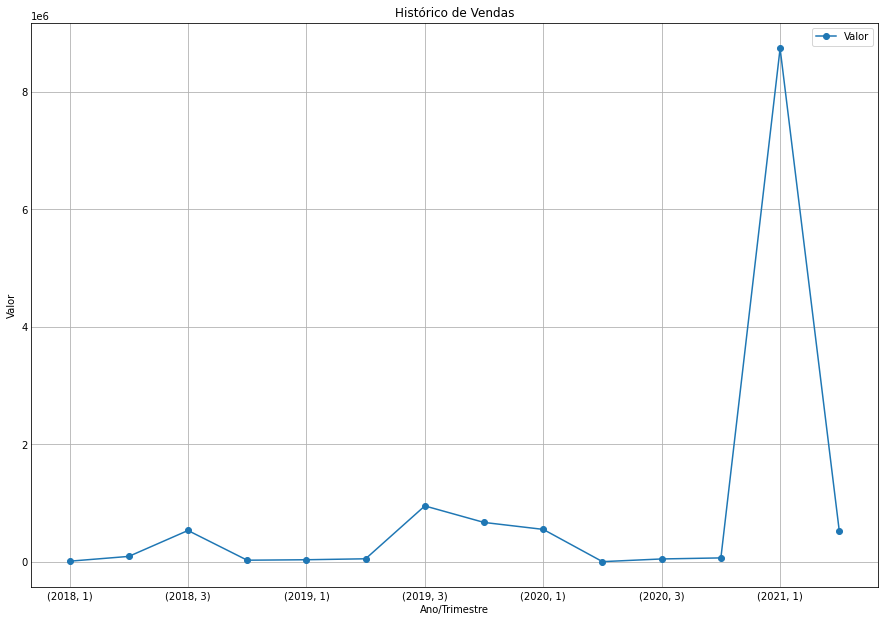

In [77]:
x = tab_venda_trimestral.groupby(by=['Ano', 'Trimestre'])[['Valor']].sum()
x.plot(figsize=(12, 8),
       marker='o',
       title='Histórico de Vendas',
       grid=True,
       xlabel='Ano/Trimestre',
       ylabel='Valor');